In [1]:
import numpy as np
import pandas as pd
import geopandas as gp
import matplotlib.pyplot as plt
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

In [17]:
# File with public supply total GW + SW
usgs_2020 = pd.read_csv(r'C:\Users\mhardika\Documents\AMO\2050\analysis_files_2024\PS_HUC12_GW_2000_2020.csv')
# Machine learning model output for domestic demand per capita
dpc_2020 = pd.read_csv(r'C:\Users\mhardika\Documents\AMO\2050\analysis_files_2024\delivery_water_use_model\predictions\national_dpc_predictions.csv')
# Baseline water treatment train files
wt_baseline = pd.read_csv(r'C:\Users\mhardika\Documents\AMO\2050\analysis_files_2024\2020_wt_baseline_spreadsheet.csv')
# Read state and county shapefiles
us_counties = gp.read_file(r'\Users\mhardika\Documents\AMO\GeoToolAll_Methods\GeoData\US_County_Boundaries\US_CountyBndrys.shp')
us_counties = us_counties.to_crs("EPSG:4326")
us_states = gp.read_file(r'C:\Users\mhardika\Documents\AMO\2050\analysis_files\tl_rd22_us_state\tl_rd22_us_state.shp')
us_states = us_states.to_crs("EPSG:4326")
# USGS 2017 data for WSA
usgs_wsa = gp.read_file(r'C:\Users\mhardika\Downloads\WSA_v1\WSA_v1\WSA_v1.shp')
usgs_gu_wwsa = gp.read_file(r'C:\Users\mhardika\Downloads\V1_GU_wWS\V1_GU_wWS\v1_GU_wWS.shp')
# Population data set
pop_df = pd.read_csv(r'\Users\mhardika\Documents\AMO\2050\analysis_files\pop_projection.csv')
pop_df = pop_df[~(pop_df == 0).any(axis=1)].reset_index(drop=True)

state_geocode = pd.read_csv(r'C:\Users\mhardika\Documents\watertap3\WaterTAP3\watertap3\watertap3\data\state_geocode.csv')

In [18]:
# Code to reassign wt_baseline facilities to correct state based on PWS ID
# Baseline water treatment train files
wt_baseline = pd.read_csv(r'C:\Users\mhardika\Documents\AMO\2050\analysis_files_2024\2020_wt_baseline_spreadsheet.csv')
# County how many states have the wrong assignment
wrong_state_idx_list=[]
state_list = []
for idx, row in wt_baseline.iterrows():
    # print(row['PWS ID'][0:2])

    if row['PWS ID'][0:2].isalpha():
        # print(row['PWS ID'][0:2])
        if row['PWS ID'][0:2]!= row['State Code']:
            # print(row)
            wrong_state_idx_list.append(idx)
            state_list.append(row['PWS ID'][0:2])

print(len(wrong_state_idx_list))

# Correcting wt_baseline dataframe
new_df = pd.DataFrame({'State Code': state_list}, index = wrong_state_idx_list)
# new_df
wt_baseline_updated = wt_baseline.copy()
wt_baseline_updated.update(new_df)

wrong_state_idx_list=[]
state_list = []
for idx, row in wt_baseline_updated.iterrows():
    # print(row['PWS ID'][0:2])
    if row['PWS ID'][0:2].isalpha():
        # print(row['PWS ID'][0:2])
        if row['PWS ID'][0:2]!= row['State Code']:
            # print(row)
            wrong_state_idx_list.append(idx)
            state_list.append(row['PWS ID'][0:2])

print(len(wrong_state_idx_list))

wt_baseline = wt_baseline_updated.copy()

995
0


In [13]:
wt_baseline.head(2)

,PWS ID,PWS Name,Population Served Count,Activity Status,Primary Source,PWS Type,City Name,State Code,Zip Code,Latitude,...,"Ozonation, Post","Ozonation, Pre",Permanganate,Peroxide,Rapid Mix,Reverse Osmosis,Sedimentation,Sequestration,Sludge Treatment,Ultraviolet Radiation
0,010106001,Mashantucket Pequot Water System,37807,Active,Groundwater under influence of surface water,Community water system,MASHANTUCKET,CT,06339-3060,41.46446,...,0,0,0,0,0,0,1,0,0,0
1,010307001,Aquinnah Wampanoag,103,Active,Ground water,Community water system,CHILMARK,MA,02535,NaN,...,0,0,0,0,0,0,0,0,0,0


In [19]:
wt_facilities_no_filter = pd.read_csv(r'C:\Users\mhardika\Documents\AMO\2050\analysis_files_2024\SDWIS.csv')
wt_facilities_no_filter_inactive = wt_facilities_no_filter.loc[wt_facilities_no_filter['Facility Activity']=='Inactive']
wt_facilities_no_filter_inactive = wt_facilities_no_filter_inactive.drop_duplicates(subset=['PWS ID'])
wt_facilities_no_filter.head(2)

C:\Users\mhardika\AppData\Local\Temp\1\ipykernel_19204\1477510235.py:1: DtypeWarning: Columns (12,13,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  wt_facilities_no_filter = pd.read_csv(r'C:\Users\mhardika\Documents\AMO\2050\analysis_files_2024\SDWIS.csv')


,PWS ID,PWS Name,Facility Id,Facility Name,EPA Region,Primacy Agency,Facility Type Description,Is Source Ind,Activity Status,Deactivation Date,...,Season End Date,Population Served Count,Service Connections Count,Is Wholesaler,Seller Pwsid,Seller Pws Name,Seller Treatment Description,Filtration Status Description,Treatment Process,Treatment Objective
0,AR0000601,DARDANELLE WATERWORKS,780,WTP ONLY ACTIVE PLANT,Region 6,Arkansas,Treatment Plant,N,Active,NaN,...,NaN,4228.0,1618,N,NaN,NaN,NaN,NaN,Activated Alumina,Inorganics removal
1,AR0000604,OLA WATERWORKS,960,MASTER METER,Region 6,Arkansas,Treatment Plant,N,Active,NaN,...,NaN,998.0,415,N,NaN,NaN,NaN,NaN,Activated Alumina,Inorganics removal


In [20]:
wt_baseline_sorted = wt_baseline.sort_values(['PWS ID'])
usgs_wsa_sorted = usgs_wsa.sort_values('WSA_AGIDF')
# wt_baseline_sorted.head(3)

In [5]:
# Make the wsa string with 9 characters
dpc_2020_sorted = dpc_2020.sort_values(['wsa_agidf'])
dpc_2020_sorted = dpc_2020_sorted[dpc_2020_sorted['year']==2020]

updated_column_list = []

for idx,row in dpc_2020_sorted.iterrows():
    try:
        a = int(row['wsa_agidf'])
        # print(f'{a:09d}')
        updated_column_list.append(str(f'{a:09d}'))
    except:
        updated_column_list.append(row['wsa_agidf'].upper())

dpc_2020_sorted['wsa_agidf'] = updated_column_list
# dpc_2020_sorted.head(5)

common_list = []
uncommon_list = []
for idx,row in dpc_2020_sorted.iterrows():
    if row['wsa_agidf'] in wt_baseline_sorted['PWS ID'].values:
        common_list.append(row['wsa_agidf'])
    else:
        uncommon_list.append(row['wsa_agidf'])

In [7]:
# check if dpc and wsa datasets have the same wsas
print(len(uncommon_list))
print(len(common_list))
print(len(wt_baseline_sorted))
print(len(dpc_2020_sorted))
print(len(usgs_wsa))

2300
16507
36020
18807
18806


C:\Users\mhardika\AppData\Local\Temp\1\ipykernel_19204\1477510235.py:1: DtypeWarning: Columns (12,13,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  wt_facilities_no_filter = pd.read_csv(r'C:\Users\mhardika\Documents\AMO\2050\analysis_files_2024\SDWIS.csv')


,PWS ID,PWS Name,Facility Id,Facility Name,EPA Region,Primacy Agency,Facility Type Description,Is Source Ind,Activity Status,Deactivation Date,...,Season End Date,Population Served Count,Service Connections Count,Is Wholesaler,Seller Pwsid,Seller Pws Name,Seller Treatment Description,Filtration Status Description,Treatment Process,Treatment Objective
0,AR0000601,DARDANELLE WATERWORKS,780,WTP ONLY ACTIVE PLANT,Region 6,Arkansas,Treatment Plant,N,Active,NaN,...,NaN,4228.0,1618,N,NaN,NaN,NaN,NaN,Activated Alumina,Inorganics removal
1,AR0000604,OLA WATERWORKS,960,MASTER METER,Region 6,Arkansas,Treatment Plant,N,Active,NaN,...,NaN,998.0,415,N,NaN,NaN,NaN,NaN,Activated Alumina,Inorganics removal


In [9]:
# Checking if uncommon list in inactive set
inactive_pws_id_list = []
no_clue_list = []
for pws in uncommon_list:
    if pws in wt_facilities_no_filter['PWS ID'].values:
        inactive_pws_id_list.append(pws)
    else:
        no_clue_list.append(pws)

In [10]:
print(len(inactive_pws_id_list))
print(len(no_clue_list))

print(no_clue_list)

461
1839
['430516073353600', '055294202', '055294602', '055294603', '055295101', '055295501', '055295502', '055295503', '083090004', '083090005', '083090007', '083090022', '083090024', '083090025', '083090032', '083090034', '083090047', '083090053', '083890007', '084690453', '084690461', '084690471', '084690478', '084690481', '090400022', '090400026', '090400206', '090400301', '090403010', '905045000000499', '936000000355', '94900700012', '94900700013', '95502100020', '95502500066', 'AL0000033', 'AL0000179', 'AL0000277', 'AL0000404', 'AL0000551', 'AL0000595', 'AL0000618', 'AL0001130', 'AL0001199', 'AL0001298', 'AL0001337', 'AL0001411', 'AL0001786', 'AR0000041', 'AR0000055', 'AR0000062', 'AR0000075', 'AR0000142', 'AR0000263', 'AR0000285', 'AR0000287', 'AR0000288', 'AR0000348', 'AR0000355', 'AR0000463', 'AR0000512', 'AR0000519', 'AR0000532', 'AR0000566', 'AR0000569', 'AR0000605', 'AR0000648', 'AR0000855', 'AZ0401001', 'AZ0401015', 'AZ0401019', 'AZ0401039', 'AZ0401047', 'AZ0401049', 'AZ04

USGS Data Analysis Datasets:
1. 2000-2020 HUC dataset
2. National DPC modeled using the 2000-2020 dataset
3. WSA dataset with poylgons describing service area and population in each service area. (what year?)
4. A more details geographical unit (GU) data set

In [6]:
# usgs_gu_wwsa.loc[1]

In [6]:
# wt_baseline.head(2)

In [25]:
# Filter list facilities from both SDWIS and USGS (DPC) and list where they exist
# Comparison of USGS and SDWIS data of population

combined_df_2020 = pd.DataFrame()
# Grab PWS ID and WSA from SDWIS and USGS data
pws_id = wt_baseline['PWS ID'].values
pws_inactive_id = wt_facilities_no_filter_inactive['PWS ID'].values
dpc = dpc_2020_sorted['wsa_agidf'].values

all_wsa_pwd = np.concatenate([dpc,pws_id,pws_inactive_id])
combined_df_2020['combined_ids'] = all_wsa_pwd
combined_df_2020.drop_duplicates('combined_ids',inplace=True)
combined_df_2020.dropna(inplace=True)

combined_df_2020.reset_index(inplace=True)
combined_df_2020.drop(columns='index',inplace=True)
print('SDWIS data:',len(pws_id))
print('USGS 2020 data:',len(dpc))
print('Combined:',len(combined_df_2020['combined_ids']))

usgs_pop_list = []
sdwis_pop_list = []
state_code_list = []
usgs_check_list = []
sdwis_check_list = []
sdwis_inactive_check_list = []

for idx,row in combined_df_2020.iterrows():
    state = []

    # Check if the facility in SDWIS active facilities list
    if row['combined_ids'] in wt_baseline['PWS ID'].values:
        sdwis_check_list.append(1)
        sdwis_inactive_check_list.append(0)
        sdwis_pop_list.append(wt_baseline[wt_baseline['PWS ID']==row['combined_ids']]['Population Served Count'].values[0])
        state = wt_baseline[wt_baseline['PWS ID']==row['combined_ids']]['State Code'].values[0]
    # Check if the facility in the SDWIS inactive facility list
    elif row['combined_ids'] in wt_facilities_no_filter_inactive['PWS ID'].values:
        sdwis_inactive_check_list.append(1)
        sdwis_check_list.append(0)
        sdwis_pop_list.append(wt_facilities_no_filter_inactive[wt_facilities_no_filter_inactive['PWS ID']==row['combined_ids']]['Population Served Count'].values[0])
        state = wt_facilities_no_filter_inactive[wt_facilities_no_filter_inactive['PWS ID']==row['combined_ids']]['Primacy Agency'].values[0]
    else:
        sdwis_check_list.append(0)
        sdwis_inactive_check_list.append(0)
        sdwis_pop_list.append(0)
        state_name = usgs_wsa_sorted[usgs_wsa_sorted['WSA_AGIDF']==row['combined_ids']]['STATE_NAME'].values[0]
        state = state_geocode[state_geocode['state']==state_name]['abbv'].values[0]
        # state_code_list.append()

    if row['combined_ids'] in dpc_2020_sorted['wsa_agidf'].values:
        usgs_check_list.append(1)
        usgs_pop_list.append(dpc_2020_sorted[dpc_2020_sorted['wsa_agidf']==row['combined_ids']]['population'].values[0])
        try:
            state_name= usgs_wsa_sorted[usgs_wsa_sorted['WSA_AGIDF']==row['combined_ids']]['STATE_NAME'].values[0]
            state = state_geocode[state_geocode['state']==state_name]['abbv'].values[0]
        except:
            state = row['combined_ids'][0:2]
        
        # state_code_list.append(usgs_wsa_sorted[usgs_wsa_sorted['WSA_AGIDF']==row['combined_ids']]['STATE_NAME'].values[0])
    else:
        usgs_check_list.append(0)
        usgs_pop_list.append(0)
    state_code_list.append(state)

combined_df_2020['usgs_check'] = usgs_check_list
combined_df_2020['sdwis_check'] = sdwis_check_list
combined_df_2020['sdwis_inactive_check'] = sdwis_inactive_check_list
combined_df_2020['usgs_pop'] = usgs_pop_list
combined_df_2020['sdwis_pop'] = sdwis_pop_list
combined_df_2020['state_code'] = state_code_list

SDWIS data: 36020
USGS 2020 data: 18807
Combined: 40903


In [123]:
# List of facilities at are inactive in the sdwis dataset
inactive_pws_id_list = []
for idx, row in wt_facilities_no_filter_inactive.iterrows():
    if row['PWS ID'] in combined_df_2020['combined_ids'].values:
        # print(row['PWS ID'])
        inactive_pws_id_list.append(row['PWS ID'])


In [125]:
len(inactive_pws_id_list)
# combined_df_2020[combined_df_2020['combined_ids']==inactive_pws_id_list[0]]

10964

In [26]:
# Going through all states and checking things

combined_state_wise_df = pd.DataFrame()

state_code_list = []
usgs_state_pop_list = []
sdwis_state_pop_list = []
hauer_state_pop_list = []
sdwis_only_list = []
usgs_only_list = []
usgs_sdwis_inactive_list = []
common_facilities_list = []
contiguous_usa = ('AL','AZ','AR','CA','CO','CT','DE','FL','GA','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA','MI','MN','MS','MO','MT','NE',
                  'NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VT','VA','WA','WV','WI','WY','DC')


for state in contiguous_usa:
    state_code_list.append(state)
    combined_df_state = combined_df_2020.loc[(combined_df_2020['state_code']==state)]
    usgs_state_pop_list.append(combined_df_state['usgs_pop'].sum())
    sdwis_state_pop_list.append(combined_df_state['sdwis_pop'].sum())
    
    state_id = state_geocode[state_geocode['abbv']==state]['state_id'].values[0]
    pop_df_state = pop_df.loc[pop_df['state_id']==state_id].copy()
    hauer_state_pop_list.append(pop_df_state['ssp22020'].sum())
    sdwis_only_list.append(len(combined_df_state[(combined_df_state['sdwis_check']==1) & (combined_df_state['usgs_check']==0)]))
    usgs_only_list.append(len(combined_df_state[(combined_df_state['sdwis_check']==0) & (combined_df_state['usgs_check']==1)]))
    usgs_sdwis_inactive_list.append(len(combined_df_state[(combined_df_state['sdwis_inactive_check']==1) & (combined_df_state['sdwis_check']==0) & (combined_df_state['usgs_check']==1)]))
    common_facilities_list.append(len(combined_df_state[(combined_df_state['sdwis_check']==1) & (combined_df_state['usgs_check']==1)]))
    
combined_state_wise_df['state_code'] = state_code_list
combined_state_wise_df['usgs_state_pop'] = usgs_state_pop_list
combined_state_wise_df['sdwis_state_pop'] = sdwis_state_pop_list
combined_state_wise_df['hauer_state_pop'] = hauer_state_pop_list
combined_state_wise_df['sdwis_only'] = sdwis_only_list
combined_state_wise_df['usgs_only'] = usgs_only_list
combined_state_wise_df['usgs_inactive'] = usgs_sdwis_inactive_list
combined_state_wise_df['common_facilities'] = common_facilities_list

combined_state_wise_df.head(2)


,state_code,usgs_state_pop,sdwis_state_pop,hauer_state_pop,sdwis_only,usgs_only,usgs_inactive,common_facilities
0,AL,3.200455e+06,5318723.0,4.959771e+06,94,14,1,273
1,AZ,6.677942e+06,6688039.0,7.300009e+06,330,99,28,286


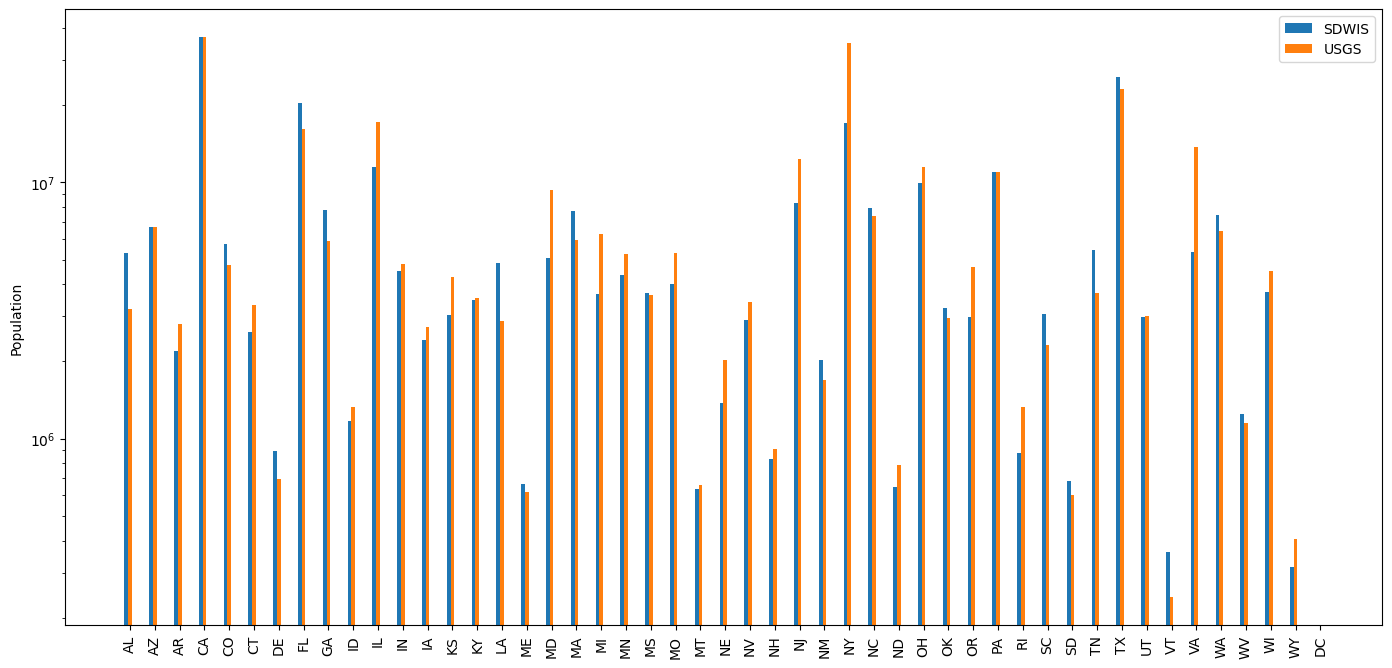

In [31]:
fig, ax = plt.subplots(figsize=(17,8))
x = np.arange(0,len(combined_state_wise_df))
# print(x,len(combined_df_ny))
ax.bar(x-0.15, combined_state_wise_df['sdwis_state_pop'],width=0.15,label='SDWIS')
ax.bar(x, combined_state_wise_df['usgs_state_pop'],width=0.15,label='USGS')
# ax.bar(x+15, combined_state_wise_df['hauer_state_pop'],width=0.15,label='Hauer')

ax.set_yscale('log')
ax.set_xticks(range(0,len(contiguous_usa)),contiguous_usa,rotation = 90)
# ax.set_xlim([750,800])
ax.set_ylabel('Population')
ax.legend()

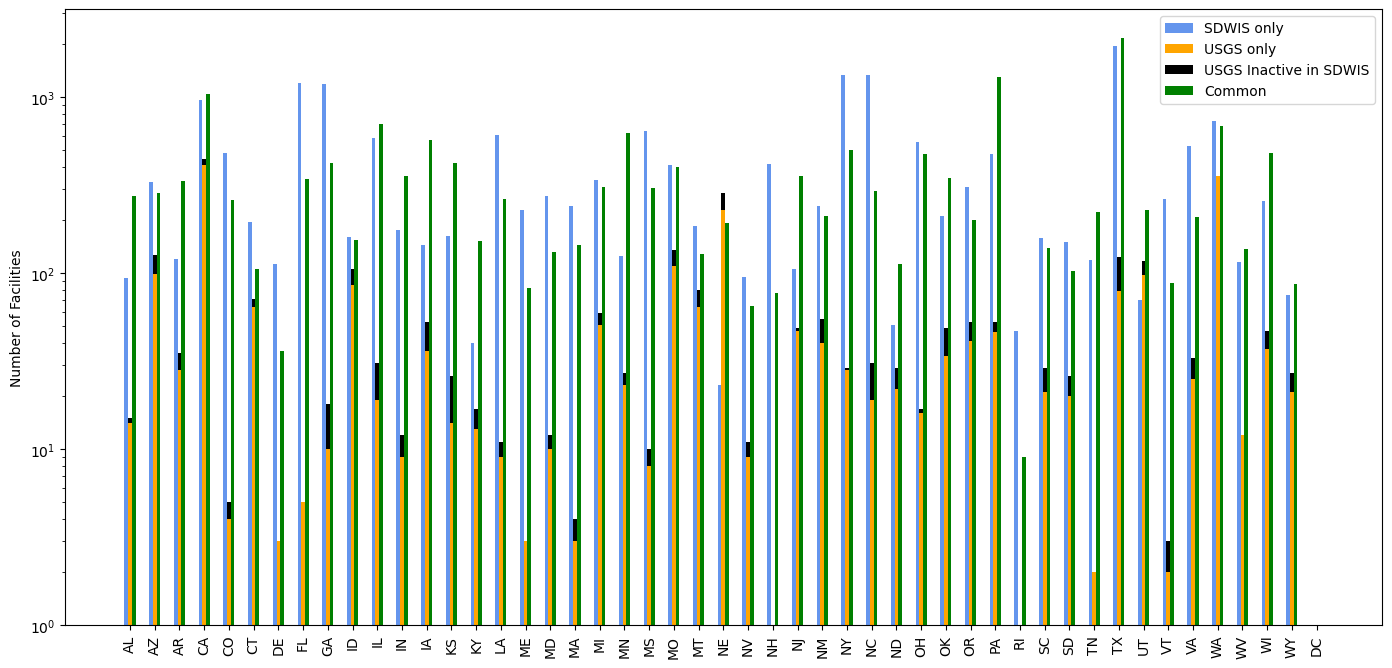

In [28]:
fig, ax = plt.subplots(figsize=(17,8))
x = np.arange(0,len(combined_state_wise_df))
# print(x,len(combined_df_ny))
ax.bar(x-0.15, combined_state_wise_df['sdwis_only'],width=0.15,label='SDWIS only',color = 'cornflowerblue')
ax.bar(x, combined_state_wise_df['usgs_only'],width=0.15,label='USGS only',color = 'orange')
ax.bar(x, combined_state_wise_df['usgs_inactive'],bottom=combined_state_wise_df['usgs_only'], width=0.15,label='USGS Inactive in SDWIS',color = 'black')

ax.bar(x+0.15, combined_state_wise_df['common_facilities'],width=0.15,label='Common',color = 'green')
ax.set_yscale('log')
ax.set_xticks(range(0,len(contiguous_usa)),contiguous_usa,rotation = 90)
# ax.set_xlim([750,800])
ax.set_ylabel('Number of Facilities')
ax.legend()

In [126]:
# # combined_df_ny['sdwis_pop'].values
# fig, ax = plt.subplots()
# x = np.arange(0,len(combined_df_state))
# # print(x,len(combined_df_ny))
# ax.bar(x+0.15, combined_df_state['sdwis_pop'],width=0.3,label='SDWIS')
# ax.bar(x-0.15, combined_df_state['usgs_pop'],width=0.3,label='USGS')
# ax.set_yscale('log')
# ax.set_xlim([750,800])
# ax.legend()


Specific State Test

In [29]:
# Checking population for New York
state_code = 'NY'
combined_df_state = combined_df_2020.loc[(combined_df_2020['state_code']==state_code)]

In [156]:
# sdwis_cws_ny = pd.read_csv(r'C:\Users\mhardika\Documents\AMO\2050\analysis_files_2024\testing_sdwis_dataset\sdwis_cws_ny.csv')
# print(len(sdwis_cws_ny))
# sdwis_cws_ny = sdwis_cws_ny.loc[sdwis_cws_ny['Facility Type Description']=='Treatment Plant']
# sdwis_cws_ny = sdwis_cws_ny.loc[sdwis_cws_ny['Facility Activity']=='Active']
# sdwis_cws_ny = sdwis_cws_ny.drop_duplicates(subset = ['PWS ID'])
# print(len(sdwis_cws_ny))
# sdwis_cws_ny.head(2)
# print(len(wt_baseline_updated.loc[wt_baseline_updated['State Code']=='NY']))

In [30]:
print('SDWIS',combined_df_state['sdwis_pop'].sum())
print('USGS',combined_df_state['usgs_pop'].sum())

state_id = state_geocode[state_geocode['abbv']==state_code]['state_id'].values[0]
print(state_id)
pop_df_state = pop_df.loc[pop_df['state_id']==state_id].copy()
print('Hauer population data',round(pop_df_state['ssp22020'].sum()))

SDWIS 16992100.0
USGS 34974805.4347
36
Hauer population data 20242666


In [81]:
# Count number of facilities only in SDWIS
print('Facilities in SDWIS not in USGS', len(combined_df_state[(combined_df_state['sdwis_check']==1) & (combined_df_state['usgs_check']==0)]))
print('Facilities in USGS not in SDWIS', len(combined_df_state[(combined_df_state['sdwis_check']==0) & (combined_df_state['usgs_check']==1)]))

# Count number of facilities where population is very different

Facilities in SDWIS not in USGS 1337
Facilities in USGS not in SDWIS 28


In [78]:
# usgs_gu_wwsa_state = usgs_gu_wwsa.loc[usgs_gu_wwsa['STATE_NAME']=='New York']

# geodf_gu_wwsa = gp.GeoDataFrame(usgs_gu_wwsa_state, geometry=usgs_gu_wwsa_state['geometry'])
# geodf_gu_wwsa = geodf_gu_wwsa.to_crs(crs="EPSG:4326")
# fig, ax = plt.subplots(figsize=(7,5))
# ax.axis('off')

# # Add this to include other counties in Georgia
# geodf_gu_wwsa.plot(ax = ax , edgecolor='black')
# state_border = us_states.loc[us_states['STATEFP']=='36']
# state_geo = us_counties.loc[us_counties['STATEFP']=='36']
# state_border.plot(ax=ax,facecolor ='none',edgecolor ='black')
# state_geo.plot(ax=ax,facecolor ='none',edgecolor ='gray',alpha = 0.5)

In [79]:
# geodf_wsa = gp.GeoDataFrame(usgs_wsa_state, geometry=usgs_wsa_state['geometry'])
# geodf_wsa = geodf_wsa.to_crs(crs="EPSG:4326")
# fig, ax = plt.subplots(figsize=(7,5))
# ax.axis('off')

# # Add this to include other counties in Georgia
# # ga_counties.plot(ax=ax,edgecolor='black',facecolor='white')
# geodf_wsa.plot(ax = ax , edgecolor='black')
# state_border = us_states.loc[us_states['STATEFP']=='36']
# state_geo = us_counties.loc[us_counties['STATEFP']=='36']
# state_border.plot(ax=ax,facecolor ='none',edgecolor ='black')
# state_geo.plot(ax=ax,facecolor ='none',edgecolor ='gray',alpha = 0.5)

# # # Get dataset for the state
# dpc_2020_no_duplicates = dpc_2020.drop_duplicates('wsa_agidf')
# dpc_2020_no_duplicates_state = dpc_2020_no_duplicates.loc[dpc_2020_no_duplicates['wsa_agidf'].str[0:2]=='ny']
# # dpc_2020_no_duplicates_state.head(5)
# wt_baseline_state = wt_baseline.loc[wt_baseline['PWS ID'].str[0:2]=='NY']
# # wt_baseline_state.head(5)

# # Plot the facilities in MA listed in the USGS dataset
# ax.scatter(dpc_2020_no_duplicates_state['lon'],dpc_2020_no_duplicates_state['lat'],label = 'USGS',s = 3,color='green')

# # Plot the facilities in MA listed in the filtered SDWIS dataset
# ax.scatter(wt_baseline_state['Longitude'],wt_baseline_state['Latitude'],label='SDWIS',s=1)

# ax.legend()



In [81]:
# for idx,row in usgs_wsa.iterrows():
#     if len(row['WSA_AGIDF'])>9:
#         print(row['STATE_NAME'],row['WSA_AGIDF'])

# for idx,row in usgs_gu_wwsa.iterrows():
#     if len(row['WSA_AGIDF'])>9:
#         print(row['STATE_NAME'],row['WSA_AGIDF'])


In [14]:
# # Checking how many treatment facilities are in a county for the state NY
# # Plot the state of MA

# state_border = us_states.loc[us_states['STATEFP']=='36']
# state_geo = us_counties.loc[us_counties['STATEFP']=='36']

# fig, ax = plt.subplots(figsize = (14,6))
# state_border.plot(ax=ax,facecolor ='none',edgecolor ='black')
# state_geo.plot(ax=ax,facecolor ='none',edgecolor ='gray',alpha = 0.5)

# # Get dataset for the state
# dpc_2020_no_duplicates = dpc_2020.drop_duplicates('wsa_agidf')
# dpc_2020_no_duplicates_state = dpc_2020_no_duplicates.loc[dpc_2020_no_duplicates['wsa_agidf'].str[0:2]=='ny']
# # dpc_2020_no_duplicates_state.head(5)
# wt_baseline_state = wt_baseline.loc[wt_baseline['PWS ID'].str[0:2]=='NY']
# # wt_baseline_state.head(5)

# # Plot the facilities in MA listed in the USGS dataset
# ax.scatter(dpc_2020_no_duplicates_state['lon'],dpc_2020_no_duplicates_state['lat'],label = 'USGS',s = 30)

# # Plot the facilities in MA listed in the filtered SDWIS dataset
# ax.scatter(wt_baseline_state['Longitude'],wt_baseline_state['Latitude'],label='SDWIS',s=10)

# ax.legend()